## Linguistic Evaluation

In [14]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import os

def process_and_plot_csv_data_with_base(file_paths, columns, eval_name, output_dir):
    # Initialize a DataFrame to store the data
    data = pd.DataFrame(columns=columns)

    # Ensure the output directory exists
    os.makedirs(output_dir, exist_ok=True)

    # Read the last line of each file and append to the DataFrame
    for i, file_path in enumerate(file_paths):
        with open(file_path, 'r') as file:
            last_line = list(csv.reader(file))[-1]
            if i == 0:
                # Set the first file's last line as "base"
                data.loc["base"] = [float(val) for val in last_line]
            else:
                row_name = f"GEN{i-1}"
                data.loc[row_name] = [float(val) for val in last_line]

    # Save the DataFrame to a CSV file in the output directory
    output_csv_path = os.path.join(output_dir, f'summary_{eval_name}.csv')
    data.to_csv(output_csv_path, index=True)
    print(data)
    
    # Plot each column and save to the specified output directory
    for column in columns:
        plt.figure(figsize=(10, 5))
        plt.plot(data.index, data[column], marker='o')
        plt.title(f'{column} over Generations')
        plt.xlabel('Generation')
        plt.ylabel(column)
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.tight_layout()
        output_image_path = os.path.join(output_dir, f'{column}_plot.png')
        plt.savefig(output_image_path)
        plt.show()



      Distinct-2  Distinct-3  Self-BLEU    OV-TTR    MS-TTR  S-DIV-AV  \
base    0.999608    1.000000   1.000000  0.961854  0.980630  0.768293   
GEN0    0.973382    0.981486   0.999508  0.853721  0.937361  0.800968   
GEN1    0.986382    0.993807   0.999420  0.870570  0.949274  0.815035   
GEN2    0.969361    0.976282   0.999802  0.863324  0.928885  0.801276   
GEN3    0.986422    0.993631   0.998058  0.864618  0.949304  0.807336   
GEN4    0.976052    0.983941   0.999391  0.868769  0.935354  0.803510   

       S-DIV-C   SYN-DIV  
base  0.282428  0.551157  
GEN0  0.460437  0.803593  
GEN1  0.469541  0.796427  
GEN2  0.449132  0.783230  
GEN3  0.451102  0.778374  
GEN4  0.458173  0.798070  


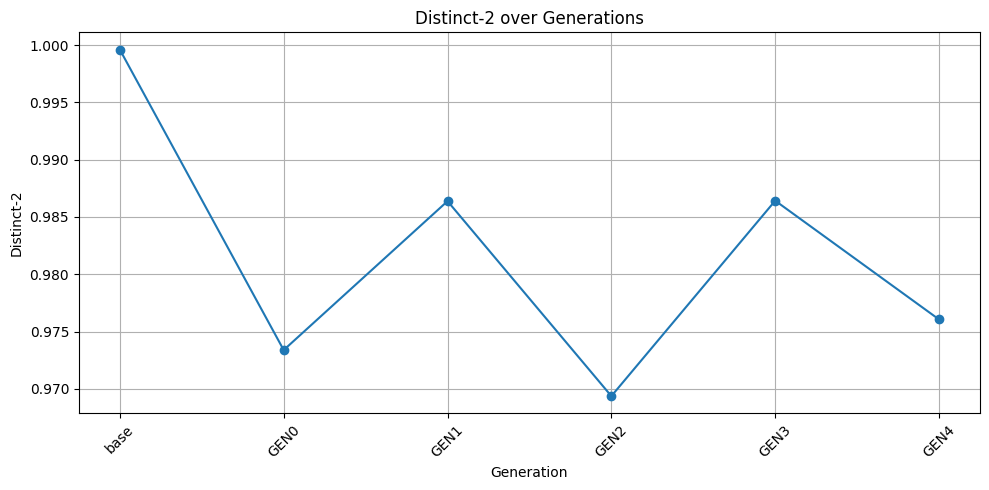

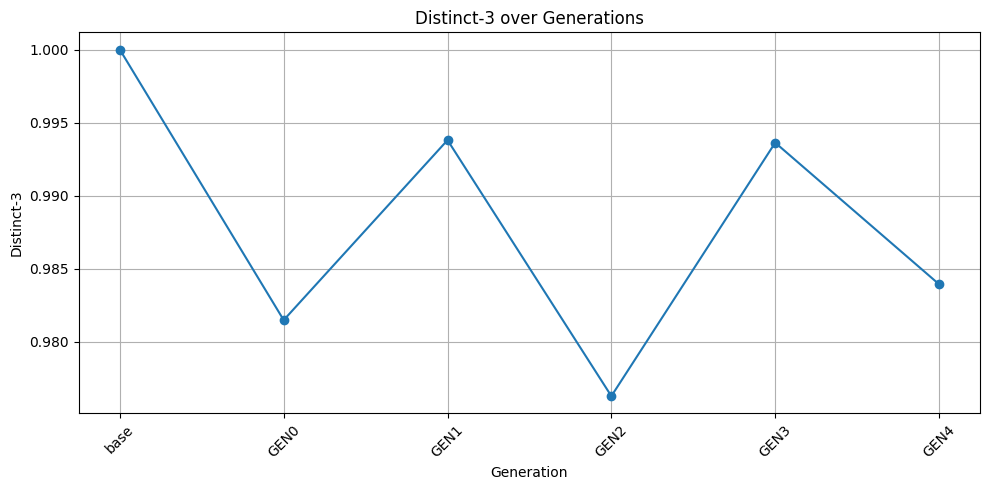

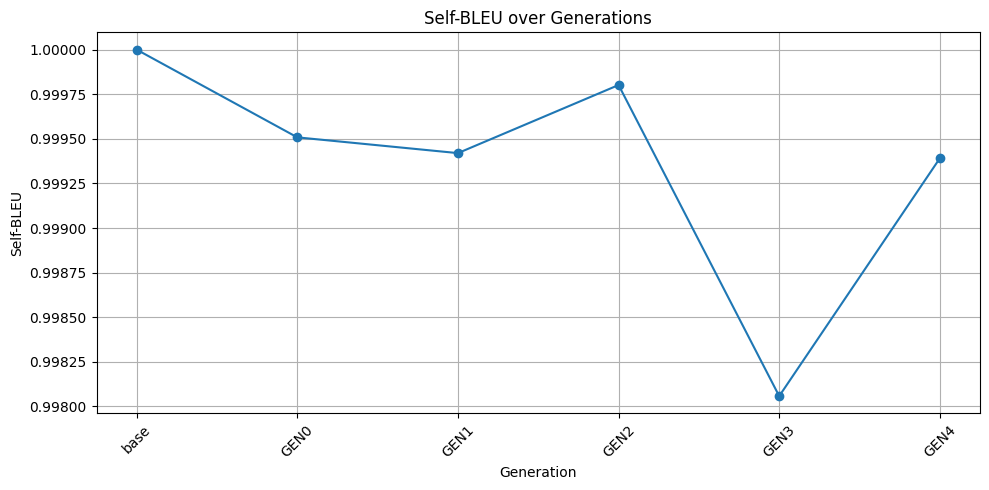

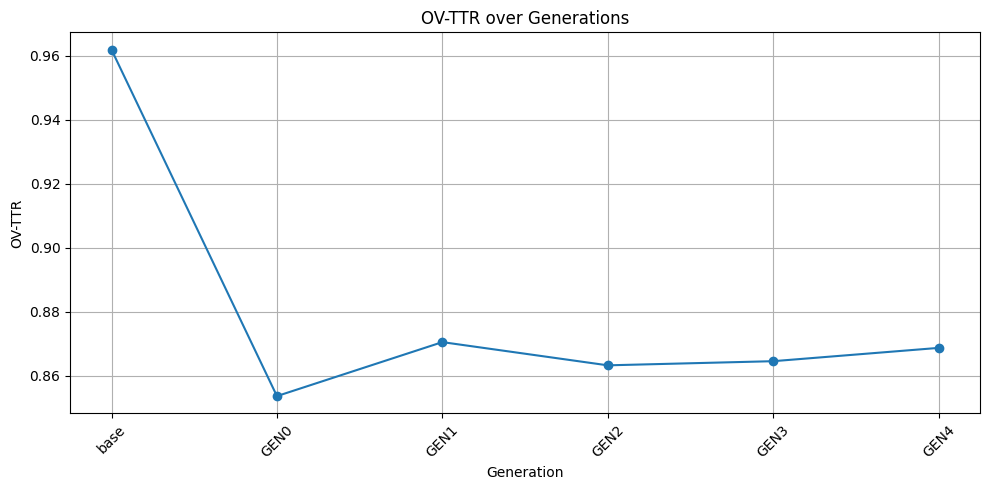

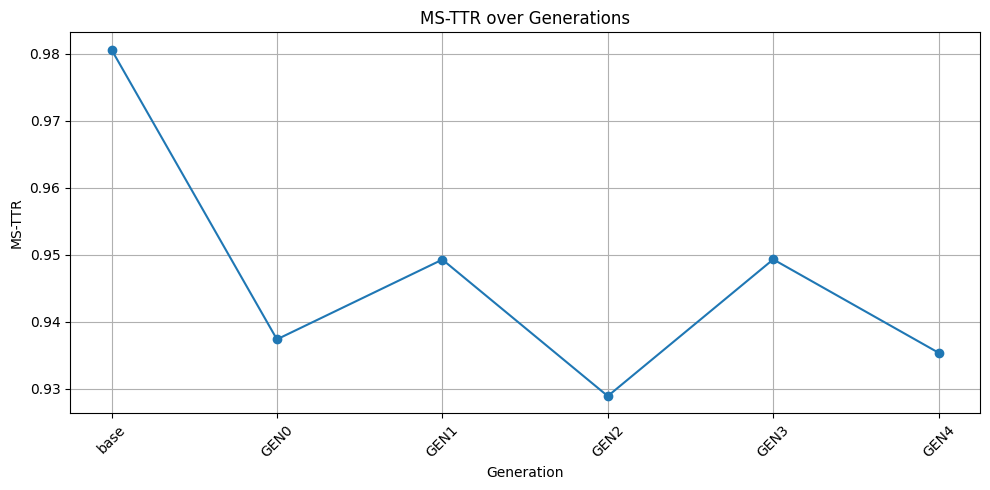

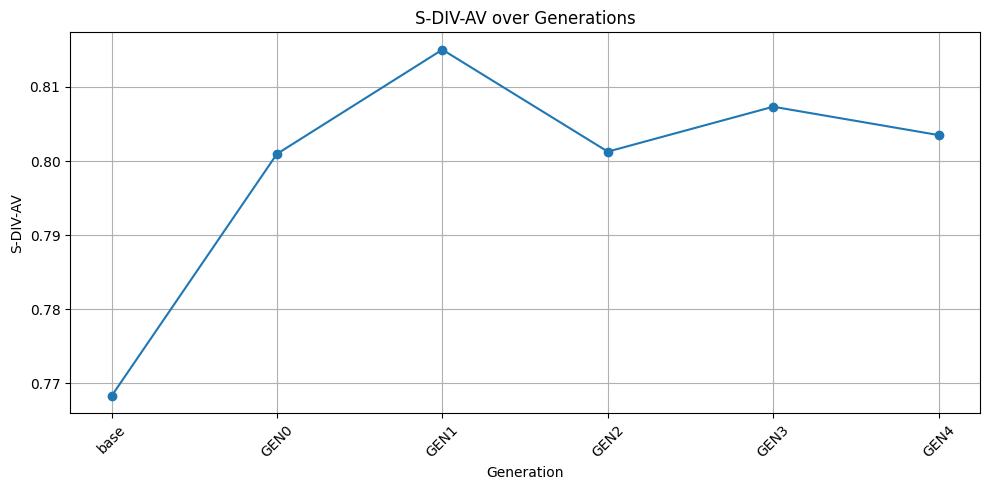

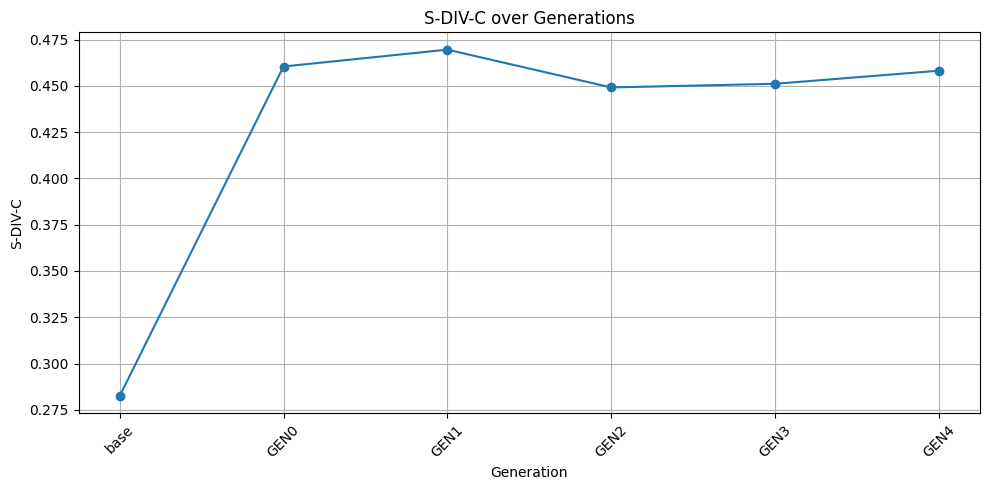

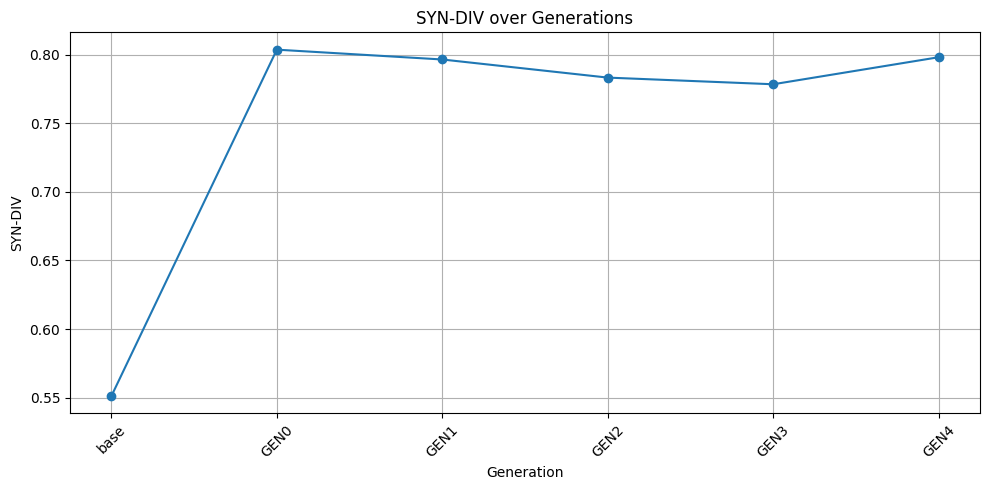

In [15]:
eval_files = [
    "outputs/base/eval_table_base.csv",
    "outputs/gen0/eval_table_gen0.csv",
    "outputs/gen1/eval_table_gen1.csv",
    "outputs/gen2/eval_table_gen2.csv",
    "outputs/gen3/eval_table_gen3.csv",
    "outputs/gen4/eval_table_gen4.csv"
]

columns = ["Distinct-2", "Distinct-3", "Self-BLEU", "OV-TTR", "MS-TTR", "S-DIV-AV", "S-DIV-C", "SYN-DIV"]

process_and_plot_csv_data_with_base(eval_files, columns, "linguistic", "evaluation" )

## Creativity/Originality Evaluation

      Jaccard-Sim-2  Feature-Based-Sim     Fluency  Flexibility  Originality
base       0.439042           0.735301   48.490000    58.500000     0.503361
GEN0       0.453897           0.892136  209.343434    94.040404     0.677486
GEN1       0.455242           0.909212  213.700000    94.800000     0.683446
GEN2       0.453492           0.890386  207.280000    94.250000     0.678460
GEN3       0.454371           0.899208  202.130000    93.540000     0.671259
GEN4       0.454027           0.888057  212.320000    94.450000     0.684917


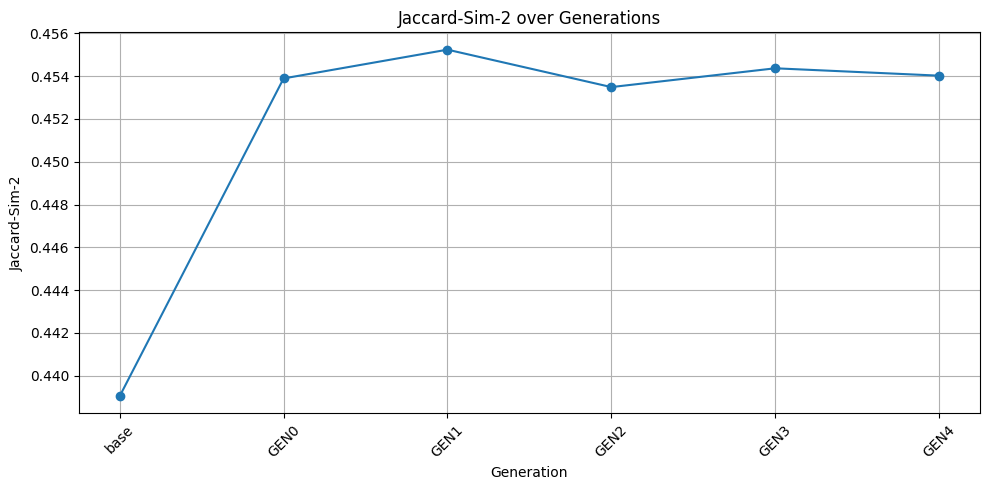

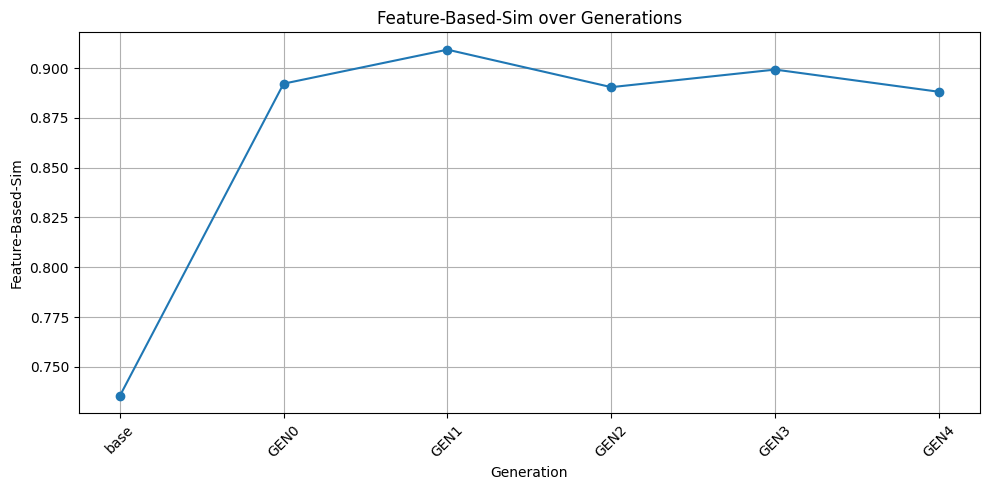

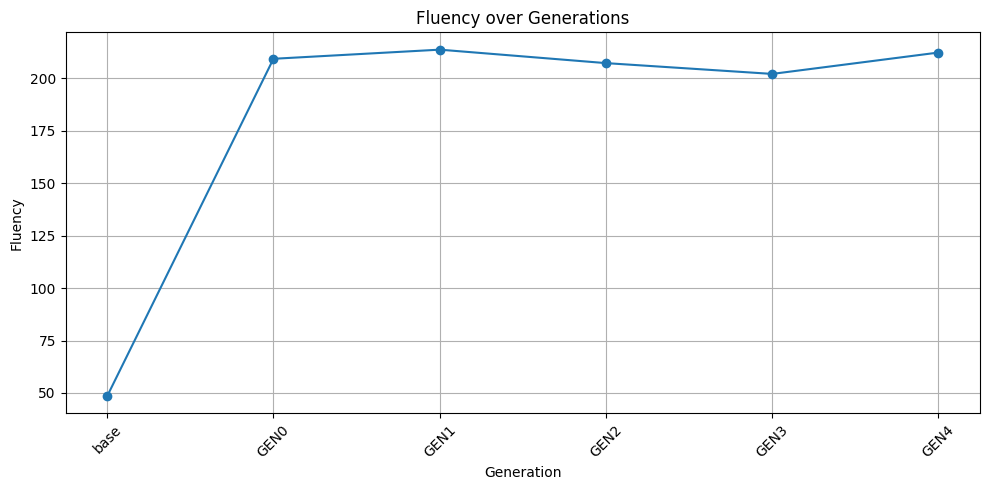

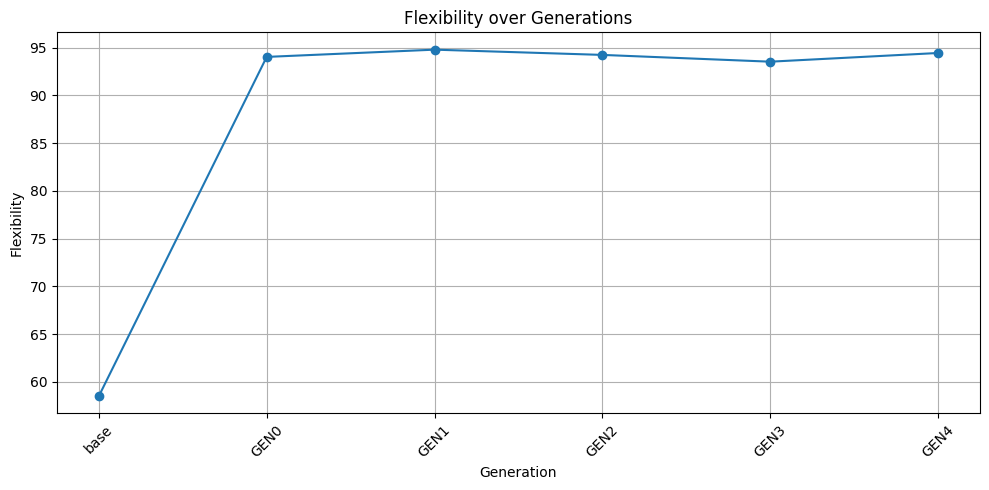

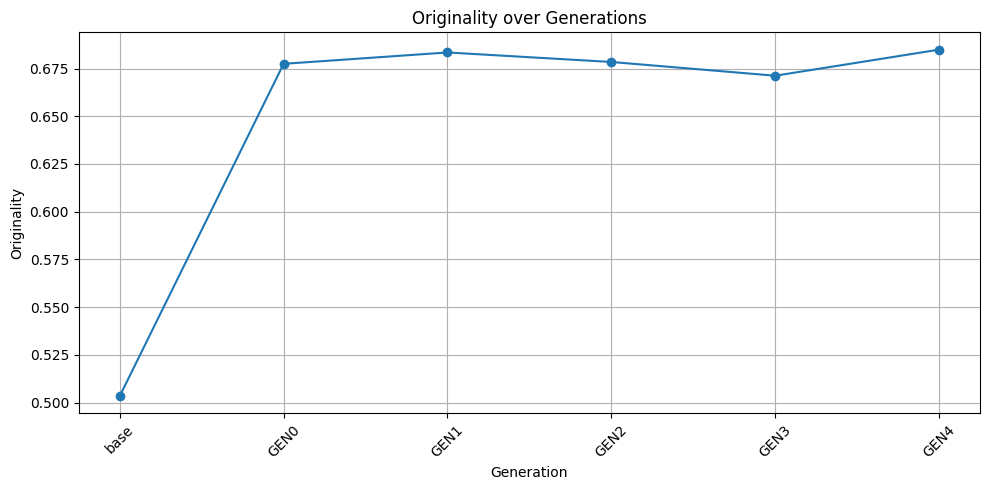

In [4]:
eval_files2 = [
    "outputs/base/eval_table_base_2.csv",
    "outputs/gen0/eval_table_gen0_2.csv",
    "outputs/gen1/eval_table_gen1_2.csv",
    "outputs/gen2/eval_table_gen2_2.csv",
    "outputs/gen3/eval_table_gen3_2.csv",
    "outputs/gen4/eval_table_gen4_2.csv"
]

columns2 = ["Jaccard-Sim-2", "Feature-Based-Sim", "Fluency", "Flexibility", "Originality"]

process_and_plot_csv_data_with_base(eval_files2, columns2, "creativity", "evaluation")